# Example 1 Data

This example shows the idea of *UNKNOWN* data distribution. 

The example simulates an *IMAGINARY* situation (see lecture materials). It demoed
that behind similar observations, the real world data could be generated in various
modes. The (i) availability (ii) theory (assumption) of these underlying knowledge
could affect the process of "Learning from Data"

In [4]:
import numpy as np
rng = np.random.RandomState(2)

# Constants
time_interval = 10 / 60  # time interval in hours (10 minutes)
num_intervals = 50  # number of intervals (for 200 minutes of tracking)
region_size = 20  # size of the region in nautical miles
noise_std_dev = 0.05  # standard deviation of the Gaussian noise in nautical miles

# Randomly draw the submarine speed from 0 to 5 knots
submarine_speed_knots = rng.uniform(0, 5)

# Randomly initialize the submarine's initial position within the region
submarine_position = rng.uniform(0, region_size, size=2)
# Update submarine position (assuming constant speed in a random direction)
direction = np.random.uniform(0, 2 * np.pi)  # random direction in radians

# Data storage
time_points = np.arange(0, num_intervals * time_interval, time_interval)
true_positions = []
detector_positions = []
noisy_distances = []

# Simulate the submarine movement and sonar reports
for t in time_points:
    true_positions.append(submarine_position.copy())
    
    # Randomly deploy a new detector within the region
    current_detector_pos = rng.uniform(0, region_size, size=2)
    
    # Generate noisy distance measurement from the active detector
    distance = np.linalg.norm(current_detector_pos - submarine_position)
    noisy_distance = distance + np.random.normal(0, noise_std_dev)
    noisy_distances.append(noisy_distance)
    detector_positions.append(current_detector_pos)
    
    
    
    displacement = submarine_speed_knots * time_interval
    submarine_position += displacement * np.array([np.cos(direction), np.sin(direction)])

# Display the data
print("Time (hours)",
    "Detector Pos X (nm)", "Detector Pos Y (nm)", "Noisy Distance (nm)", 
    "Submarine Pos X (nm)", "Submarine Pos Y (nm)",
    sep="\t")
for t, pos_d, d, pos_s, in zip(time_points, detector_positions, noisy_distances, true_positions):
    print(f"{t:.2f}\t{pos_d[0]:.2f}\t{pos_d[1]:.2f}\t{d:.2f}\t{pos_s[0]:.2f}\t{pos_s[1]:.2f}")


# Optionally, save the data to a CSV file without using pandas
with open("submarine_tracking_data.csv", "w") as f:
    f.write("Time (hours),Submarine Position X (nm),Submarine Position Y (nm),Noisy Distance (nm)\n")
    for t, pos_d, d, pos_s, in zip(time_points, detector_positions, noisy_distances, true_positions):
        f.write(f"{t:.2f}\t{pos_d[0]:.2f}\t{pos_d[1]:.2f}\t{d:.2f}\t{pos_s[0]:.2f}\t{pos_s[1]:.2f}\n")



Time (hours)	Detector Pos X (nm)	Detector Pos Y (nm)	Noisy Distance (nm)	Submarine Pos X (nm)	Submarine Pos Y (nm)
0.00	8.71	8.41	8.61	0.52	10.99
0.17	6.61	4.09	9.38	0.63	11.34
0.33	12.39	5.99	12.97	0.73	11.69
0.50	5.34	12.42	4.59	0.84	12.04
0.67	10.58	2.69	13.61	0.94	12.38
0.83	10.27	3.69	12.81	1.05	12.73
1.00	15.71	17.08	15.13	1.16	13.08
1.17	9.88	16.93	9.26	1.26	13.42
1.33	1.59	10.10	3.73	1.37	13.77
1.50	1.31	8.56	5.60	1.48	14.12
1.67	1.93	2.54	11.84	1.58	14.47
1.83	11.93	4.52	14.47	1.69	14.81
2.00	2.14	4.41	10.77	1.80	15.16
2.17	7.00	9.36	8.01	1.90	15.51
2.33	4.03	12.81	3.64	2.01	15.86
2.50	9.66	10.10	9.52	2.12	16.20
2.67	7.74	15.87	5.58	2.22	16.55
2.83	11.60	3.25	16.34	2.33	16.90
3.00	14.02	19.29	11.82	2.44	17.25
3.17	10.00	17.79	7.54	2.54	17.59
3.33	6.83	11.34	7.82	2.65	17.94
3.50	8.55	8.73	11.26	2.76	18.29
3.67	15.53	10.71	14.94	2.86	18.63
3.83	19.07	10.88	17.97	2.97	18.98
4.00	1.64	7.33	12.10	3.08	19.33
4.17	17.02	8.13	18.08	3.18	19.68
4.33	0.54	4.94	15.33	3.29	20.02
4.50	1.34	

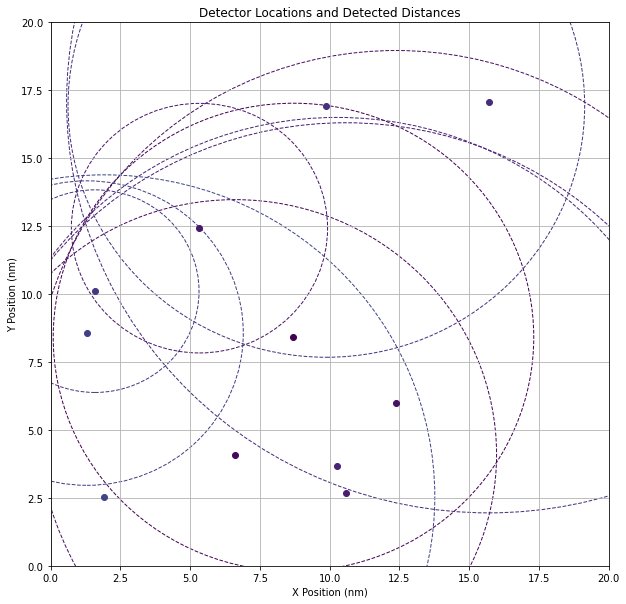

In [7]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
cmap = cm.viridis
norm = plt.Normalize(time_points.min(), time_points.max())
# Visualization
plt.figure(figsize=(10, 10))
plt.xlim(0, region_size)
plt.ylim(0, region_size)

# Plot the detector locations and circles representing the detected distances
for t, pos_d, d in zip(time_points, detector_positions, noisy_distances):
    color = cmap(norm(t))
    circle = plt.Circle(pos_d, d, color=color, fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)
    plt.plot(pos_d[0], pos_d[1], 'o', color=color)
    # if norm(t)>0.2:break

SHOW_TRAJ = False
if SHOW_TRAJ:
    # Plot the links between detectors in the order they were deployed
    for i in range(1, len(true_positions)):
        plt.plot(
            [true_positions[i-1][0], true_positions[i][0]],
            [true_positions[i-1][1], true_positions[i][1]],
            'o:', color=[1, 0, 0, 0.3]
        )

# Labels and title
plt.title('Detector Locations and Detected Distances')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.grid(True)
plt.show()

Demonstrate: known submarine movement mode (constant velocity, velocity range)

Unknown submarine movement mode

# Example 2 Data and Hypotheses family

This example demos the similar notion as the previous one. The nature of the problem is simpler and allows manual exploration. This enables us to introduce the idea of *Hypothesis Family* (a collection of hypothesEs)

Prompt: 
Generate a certain number of half planes of a certain dimension, e.g. if the dim=2, then a half plane can be
specified by 4 numbers $(x=0.5, y=0.3), (u=0.7, v=-0.5)$, which contains the 2D point $(x,y)$ and the normal vector is point to $(u,v)$.

I want to use the planes to enclose a region in D-dimensional space. Therefore, please generate the half-(hyper-)planes one by one. Given a new plane, choose a normal vector so that the normal direction contains existing points.

If the new plane cannot "cut-away" existing points and has no contribution to the enclosure, discard it and do not count it as one. 

To have a relevant reference hypercube to sample those planes, please draw the "passing points" between the $m$ and $M$ values in the high dimensional space.

Also refer to the following signature design for a reference (you can change it if necessary).

Return the sampled tuples of plane-representations as a rows and all planes as a 2D numpy array, call it region_targ.

Also build a decision function, given a point $x \in \mathbb R^D$  and the $D\times (2D)$ specification of region_targ, return 0/1 -- whether $x \in R$, where $R$ is the region being enclosed.

The half planes sampling function can have a signature as follows:
```python
import numpy as np
rng = np.random.RandomState(42)

def sample_target_half_planes(
    num=5,
    dim=2,
    region_min=-1,
    region_max=+1,
    random_seed=42):
    """
    num: #.half planes 
    """

    return 
```

This is a difficult request, there are several follow-ups. See [link](https://chatgpt.com/share/75661639-4111-4cbd-8a67-3ed30cb0e65c).

In [ ]:
import numpy as np

def sample_target_half_planes(
    num=5,
    dim=2,
    region_min=-1,
    region_max=+1,
    num_samples=10000,
    min_region_ratio=0.05,
    random_seed=42):
    """
    Sample half-planes in D-dimensional space to enclose a region.

    Parameters:
    num: int, the number of half-planes to generate.
    dim: int, the dimensionality of the space.
    region_min: float, the minimum coordinate value of the reference hypercube.
    region_max: float, the maximum coordinate value of the reference hypercube.
    num_samples: int, the number of points sampled from the hypercube to use in the approximation.
    min_region_ratio: float, the minimum ratio of points that must remain in the region after adding a plane.
    random_seed: int, seed for random number generation.

    Returns:
    region_targ: numpy array, each row represents a half-plane with a passing point and a normal vector.
    """
    rng = np.random.RandomState(random_seed)
    
    # Sample a large number of points uniformly in the hypercube
    sample_points = rng.uniform(region_min, region_max, size=(num_samples, dim))
    region_size = region_max - region_min
    
    # Initialize the list to store valid half-planes
    half_planes = []
    
    # Initialize the mask indicating which points are currently in the region
    in_region = np.ones(num_samples, dtype=bool)
    
    for _ in range(num * 10):  # Allow more trials to find valid half-planes
        # Randomly choose a passing point in the hypercube
        pass_point = rng.uniform(region_min + region_size*.1, 
                                 region_max - region_size*.1, size=dim)
        
        # Generate a random normal vector
        normal_vector = rng.uniform(-1, 1, size=dim)
        normal_vector /= np.linalg.norm(normal_vector)  # Normalize
        
        # Check contribution of the new plane
        # Take the bigger chunk (AI cannot think of this)
        new_half_plane1 = np.hstack([pass_point, normal_vector])
        new_in_region1 = points_in_region(sample_points, half_planes + [new_half_plane1])
        new_half_plane2 = np.hstack([pass_point, -normal_vector])
        new_in_region2 = points_in_region(sample_points, half_planes + [new_half_plane2])
        if np.sum(new_in_region1) >= np.sum(new_in_region2):
            new_half_plane = new_half_plane1
            new_in_region = new_in_region1
        else:
            new_half_plane = new_half_plane2
            new_in_region = new_in_region2

        
        # Calculate the ratio of points remaining in the region after adding this plane
        region_ratio = np.sum(new_in_region) / num_samples
        
        if region_ratio >= min_region_ratio \
            and np.count_nonzero(new_in_region!=in_region)>0: # AI didn't get the logic right here.
            half_planes.append(new_half_plane)
            in_region = new_in_region
        
        # Stop if we have found enough valid half-planes
        if len(half_planes) >= num:
            break
    
    # Convert to numpy array
    region_targ = np.array(half_planes)
    
    return region_targ

def points_in_region(points, planes):
    """
    Check if points are inside the region defined by a set of half-planes.

    Parameters:
    points: numpy array, shape (N, D), where N is the number of points and D is the dimensionality.
    planes: list of numpy arrays, each defining a half-plane with a passing point and a normal vector.

    Returns:
    numpy array: Boolean array, where each entry is True if the corresponding point is inside the region.
    """
    in_region = np.ones(points.shape[0], dtype=bool)
    dim = points.shape[1]
    
    for plane in planes:
        pass_point = plane[:dim]
        normal_vector = plane[dim:]
        in_region &= (np.dot(points - pass_point, normal_vector) > 0)
    
    return in_region

from typing import Callable
def visualise_2D_region(in_region_fn: Callable, xy_min=-1, xy_max=+1, 
    num_points=50, title_str="Target Concept"):
    # Generate a mesh grid of points
    x = np.linspace(xy_min, xy_max, num_points)
    y = np.linspace(xy_min, xy_max, num_points)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Apply the in_region function to each point in the grid
    in_region = in_region_fn(grid_points)
    
    # Reshape the result back to the grid shape
    in_region = in_region.reshape(xx.shape)
    
    # Plot the region
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, in_region, levels=[0, 0.5, 1], colors=['#FFFF80', '#FF40FF'], alpha=0.6)
    plt.contour(xx, yy, in_region, levels=[0.5], colors='black')
    plt.xlim([xy_min, xy_max])
    plt.ylim([xy_min, xy_max])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title_str)
    plt.grid(True)
    return fig


# Example usage:
dim = 2
num = 6

concept100 = sample_target_half_planes(
    num=num, dim=dim, region_min=-1, region_max=1, num_samples=10000,
    random_seed=100)
fig = visualise_2D_region(lambda points:points_in_region(points, concept100), title_str="Concept100")

concept3 = sample_target_half_planes(
    num=20, dim=dim, region_min=-1, region_max=1, num_samples=10000,
    random_seed=3)
fig = visualise_2D_region(lambda points:points_in_region(points, concept3), title_str="Concept3")

concept6 = sample_target_half_planes(
    num=num, dim=dim, region_min=-1, region_max=1, num_samples=10000,
    random_seed=6)

fig = visualise_2D_region(lambda points:points_in_region(points, concept6), title_str="Concept6")


We try the following hypothesis: 

> The target region is a rectangle.

to "capture" the concept.

In [ ]:
# Function to create hypothesis set (rectangles)
def create_rectangle_hypothesis_set(rng, num=1000, xy_min=-1, xy_max=1):
    # Generate x1, y1, x2, y2 for rectangles
    rectangles = []
    for _ in range(num):
        x1 = rng.uniform(xy_min, xy_max)
        y1 = rng.uniform(xy_min, xy_max)
        x2 = rng.uniform(x1, xy_max)  # Ensure x2 > x1
        y2 = rng.uniform(y1, xy_max)  # Ensure y2 > y1
        rectangles.append((x1, y1, x2, y2))
    return rectangles
    

def points_inside_rectangle(points, rectangle):
    x1, y1, x2, y2 = rectangle
    c0 = points[:, 0] >= x1
    c1 = points[:, 0] <= x2
    c2 = points[:, 1] >= y1
    c3 = points[:, 1] <= y2
    return c0 * c1 * c2 * c3

true_concept = concept6
true_fn = lambda X:points_in_region(X, true_concept)
# Learning procedure

# 1. Observe samples
rng = np.random.RandomState(42)
train_num = 100
train_X = rng.uniform(-1, 1, size=(train_num, 2))
train_Y = true_fn(train_X)


# 2. Create a simple and "finite hypothesis" family
hypothesis_set = create_rectangle_hypothesis_set(rng)
best_hypothesis = None
best_score = 0

# 3. Evaluate the members
for rectangle in hypothesis_set:
    predicted_Y = points_inside_rectangle(train_X, rectangle)
    score = np.sum(predicted_Y == train_Y)
    if score > best_score:
        best_score = score
        best_hypothesis = rectangle

print("Best Hypothesis (Rectangle):", best_hypothesis)
print("Best Score:", best_score)


The following plots the idea of "rectangle hypothesis family".

Note $\mathcal H$ does not depend on the training examples.

In [ ]:
from matplotlib import patches
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(train_X[:, 0], train_X[:, 1], 
            c=1-train_Y) # just to match color, not really mattering
SHOW_H = 0
for i, h in enumerate(hypothesis_set):
    if i >= SHOW_H: 
        break
    x1, y1, x2, y2 = h
    width = x2 - x1
    height = y2 - y1
    plt.scatter(train_X[:, 0], train_X[:, 1], c=1-train_Y)
    rect = patches.Rectangle((x1, y1), width, height, edgecolor=[0,.5,0], 
                            facecolor=[1, 1, 1, 0], 
                            linestyle="--", linewidth=1)
    ax.add_patch(rect)

In [ ]:
from matplotlib import patches
fig = visualise_2D_region(true_fn, title_str="Target Concept")
ax = fig.gca()

x1, y1, x2, y2 = best_hypothesis
width = x2 - x1
height = y2 - y1
plt.scatter(train_X[:, 0], train_X[:, 1], c=1-train_Y)
rect = patches.Rectangle((x1, y1), width, height, edgecolor=[0,0,0], 
                         facecolor=[1, 0, 0, 0.3], 
                         linestyle="-", linewidth=2)
ax.add_patch(rect)

SHOW_H = 50 # len(hypothesis_set)
# also show other hypotheses for reference
for i, h in enumerate(hypothesis_set):
    if i >= SHOW_H: 
        break
    x1, y1, x2, y2 = h
    width = x2 - x1
    height = y2 - y1
    plt.scatter(train_X[:, 0], train_X[:, 1], c=1-train_Y)
    rect = patches.Rectangle((x1, y1), width, height, edgecolor=[0,.5,0], 
                            facecolor=[1, 0, 0, 0.01], 
                            linestyle=":", linewidth=1)
    ax.add_patch(rect)


In this example, we have not used a test data set to evaluate the result of learning, as one usually does in learning tasks. 

Why?

# Example 3

Following Example 2, the hypothesis in this example is 

> The target is a circle.

The following demo can be constructed from an AI assisted program from the prompt:


To demonstrate the "hypothesis family". The following program has been used to generate a set of candidates. 
```python
def create_rect_hypothesis_set # ... (the program used above)
```

Please adjust the demo to use circles as the hypotheses.

In [ ]:
# Function to create hypothesis set (circles)
def create_circle_hypothesis_set(
    rng, num=1000, xy_min=-1, xy_max=1, r_min=0.1, r_max=2.0):
    circles = []
    for _ in range(num):
        # Center of the circle
        cx = rng.uniform(xy_min, xy_max)
        cy = rng.uniform(xy_min, xy_max)
        # Radius of the circle
        r = rng.uniform(r_min, r_max) # not necessarily within the bounding box
        circles.append((cx, cy, r))
    return circles

def points_inside_circle(points, circle):
    cx, cy, r = circle
    distances = np.sqrt((points[:, 0] - cx)**2 + (points[:, 1] - cy)**2)
    return distances <= r



In [ ]:
true_concept = concept3
true_fn = lambda X:points_in_region(X, true_concept)
# Learning procedure

# 1. Observe samples
rng = np.random.RandomState(42)
train_num = 100
train_X = rng.uniform(-1, 1, size=(train_num, 2))
train_Y = true_fn(train_X)


# 2. Create a simple and "finite hypothesis" family
hypothesis_set = create_circle_hypothesis_set(rng)
best_hypothesis = None
best_score = 0

# 3. Evaluate the members
for cir in hypothesis_set:
    predicted_Y = points_inside_circle(train_X, cir)
    score = np.sum(predicted_Y == train_Y)
    if score > best_score:
        best_score = score
        best_hypothesis = cir

print("Best Hypothesis (Rectangle):", best_hypothesis)
print("Best Score:", best_score)

In [ ]:
from matplotlib import patches
fig = visualise_2D_region(true_fn, title_str="Target Concept")
ax = fig.gca()

x1, y1, r = best_hypothesis
plt.scatter(train_X[:, 0], train_X[:, 1], c=1-train_Y)
circ = patches.Circle(
    (x1, y1), r, 
    edgecolor=[0,0,0], facecolor=[1, 0, 0, 0.3], linestyle="-", linewidth=2)
ax.add_patch(circ)

SHOW_H = 20 # len(hypothesis_set)
# also show other hypotheses for reference
for i, h in enumerate(hypothesis_set):
    if i >= SHOW_H: 
        break
    x1, y1, r = h
    circ = patches.Circle(
        (x1, y1), r, 
        edgecolor=[0,.5,0], facecolor=[1, 0, 0, 0.01], 
        linestyle=":", linewidth=1)
    ax.add_patch(circ)

# Example 4

The new hypothsis becomes "multiple circles", indefinitely many. So the obvious choice is to have one centred at each training sample.

In [ ]:
true_concept = concept3
true_fn = lambda X:points_in_region(X, true_concept)
# Learning procedure

# 1. Observe samples
rng = np.random.RandomState(42)
train_num = 100
train_X = rng.uniform(-1, 1, size=(train_num, 2))
train_Y = true_fn(train_X)

within_threshold = 0.01

def predict_fn(
    X,
    trn_X, trn_Y, within_threshold
):
    """
    For each input point, find the cloest point in trn_X,
    if that distance is smaller than within_threshold,
    use the corresponding trn_Y as the prediction,
    otherwise, return a random label (True or False)

    NB: the interpretation above can be used as the prompt.
    """
    
    predictions = []
    for x in X:
        distances = np.linalg.norm(trn_X - x, axis=1)
        min_dist = np.min(distances)
        if min_dist <= within_threshold:
            closest_idx = np.argmin(distances)
            predictions.append(trn_Y[closest_idx])
        else:
            predictions.append(np.random.choice([True, False]))
    return np.array(predictions)

# No "training" is needed (already done)

In [ ]:
from matplotlib import patches
fig = visualise_2D_region(true_fn, title_str="Target Concept")
ax = fig.gca()

In [ ]:
fig = visualise_2D_region(
    lambda x:predict_fn(x, train_X, train_Y, within_threshold),
    title_str="h*"
)

# Example 5

A weird phenomenon with dimension increasing.

The following prompts were used to create the examples:

"""
Write a Python script to compute the volume of a ball of radius 1.0 and 1.001 in N dimensional space. Plot the ratio Vol(Ball(1.0)) / Val(Ball(1.001)) with N, for N = 1 to 32.
"""

The second one has an approximate computation works for large (and practically relevant dimensions -- think of dim-H in neural networks.)
"""
When N is large, this stops working, please compute the log of the vol, up to terms (in log scale) first order of N.
"""

In [ ]:
# for "small dimensions"
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def ball_volume(radius, dimension):
    """
    Compute the volume of a ball of given radius in a given dimension.
    """
    return (np.pi**(dimension / 2) / gamma(dimension / 2 + 1)) * (radius**dimension)

# Set radii
radius_1 = 1.0
radius_2 = 1.001

# Compute volumes and ratios
dimensions = np.arange(1, 33, 1)
ratios = []

for N in dimensions:
    vol_1 = ball_volume(radius_1, N)
    vol_2 = ball_volume(radius_2, N)
    ratio = vol_1 / vol_2
    ratios.append(ratio)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, ratios, marker='o')
plt.title('Ratio of Volumes of Balls in N-Dimensional Space')
plt.xlabel('Dimension (N)')
plt.ylabel('Vol(Ball(1.0)) / Vol(Ball(1.001))')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set radii
r1 = 1.0
r2 = 1.001

# Compute the ratio of volumes in log scale
dimensions = np.arange(1, 65536, 1000)
log_ratios = -dimensions * np.log(r2 / r1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, log_ratios, marker='.', linestyle=":")
plt.title('Log Ratio of Volumes of Balls in N-Dimensional Space')
plt.xlabel('Dimension (N)')
plt.ylabel('Log(Vol(Ball(1.0)) / Vol(Ball(1.001)))')
plt.grid(True)
plt.show()